In [1]:
setwd('/import/liujing/data/my')

In [2]:
load('../expr.rda')

In [3]:
# gene = read.table('../gene16.txt',header=F)
# expr = expr[,gene$V1]

In [4]:
# gene = read.table('./gene.run.auc.txt',header=T)
# expr = expr[,gene$gene]

In [5]:
library(dplyr)
colnames(expr) = gsub('-','.',colnames(expr))
head(expr,2)
Type
x = as.matrix(expr)
y = Type


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,ITGA2B,RASD2,MSLN,SEC14L5,OTOF,GAD1,MAP1B,POU2F3,SAMD14,IGF2,SCGB1C1,PLXNB3,RNF208,HBE1,HIST1H3F,CTAGE6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,2.014364,0.001520324,0.001604972,0.1785623,0.6439801,-0.001133514,0.04297155,0.0003358557,0.1074810,0.01531470,1.37707736,-0.0008865713,0.06803851,0.13897265,3.334643,0.0227968494
CI11_M1,5.547279,0.001520324,0.001604972,0.3335119,0.1319284,0.015039617,0.05555645,0.0122994827,0.4015254,0.08084769,0.08504677,0.0161659861,0.24235892,0.06789091,2.322905,0.0001278669


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [6]:
dim(x)

[1] 119  16

In [7]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [8]:
options(repr.plot.width = 6)

In [9]:
set.seed(110)

In [10]:
#  set.seed(101)

In [11]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

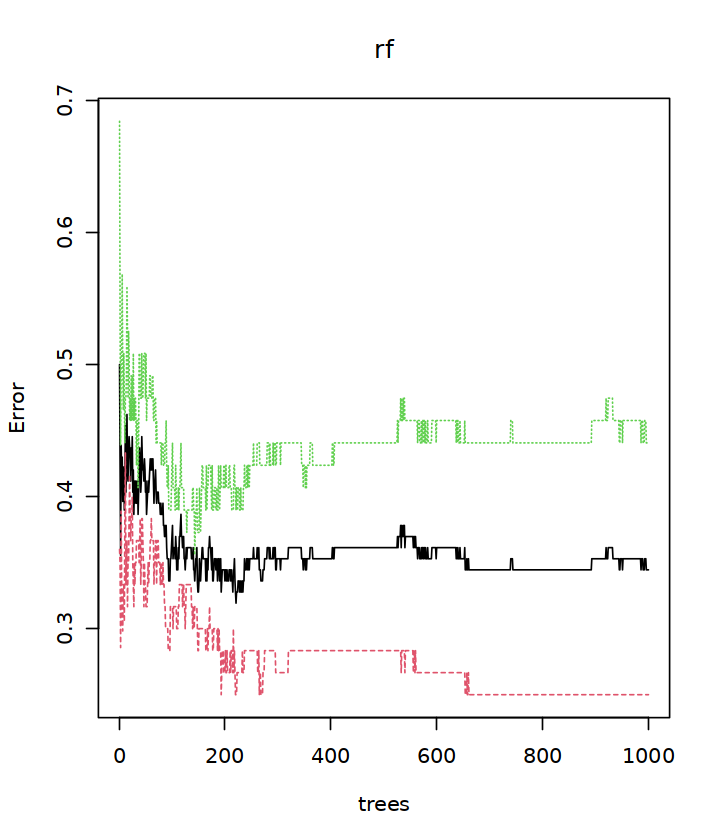

In [12]:
plot(rf)

In [13]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [14]:
trees = which.min(rf$err.rate[,1])

In [15]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [16]:
importance = importance(rf)

In [17]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [18]:
options(repr.plot.width = 4)

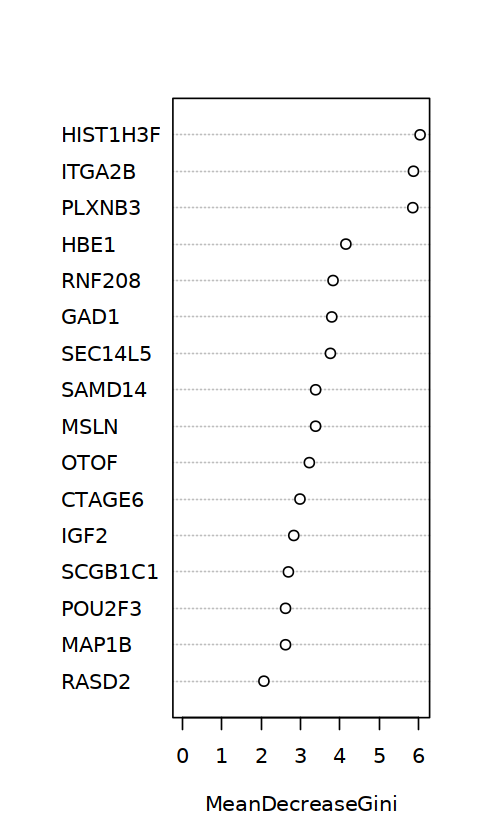

In [19]:
varImpPlot(rf,main = '')

In [20]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [21]:
rfGenes

HIST1H3F   ITGA2B   PLXNB3     HBE1   RNF208     GAD1  SEC14L5   SAMD14 
6.033295 5.864825 5.847579 4.149536 3.823700 3.791583 3.756667 3.382227 
    MSLN     OTOF   CTAGE6     IGF2  SCGB1C1   POU2F3    MAP1B    RASD2 
3.380841 3.222110 2.984150 2.827165 2.690201 2.618104 2.618083 2.068759

In [22]:
rfGenes=names(rfGenes[rfGenes>30]) 
write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

In [23]:
sigExp=expr[rfGenes,]
write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

### svm

In [24]:
library(tidyverse)
library(glmnet)
library(VennDiagram)
library(e1071)
library(caret)
library(randomForest)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.5.1     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x randomForest::combine() mas

In [25]:
y=as.numeric(as.factor(Type))

In [26]:
library(future)
plan("multisession",workers=30)

Warning message:
"package 'future' was built under R version 4.2.3"

Attaching package: 'future'


The following object is masked from 'package:caret':

    cluster




In [27]:
set.seed(1)
rfeControl = rfeControl(functions = caretFuncs,
                        method = "cv", # 默认自助法重采样 boot
                        saveDetails = T, # 保存预测值和变量重要性
                        number = 5, # 重抽样次数
                        allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
                        )

In [28]:
Profile=rfe(x=x,y=y,sizes = c(1:10),
    rfeControl =  rfeControl,
    methods="svmRadial")

Warning message in train.default(x, y, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

In [29]:
pdf(file="SVM-RFE.pdf", width=6, height=5.5)
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
dev.off()

png 
  2

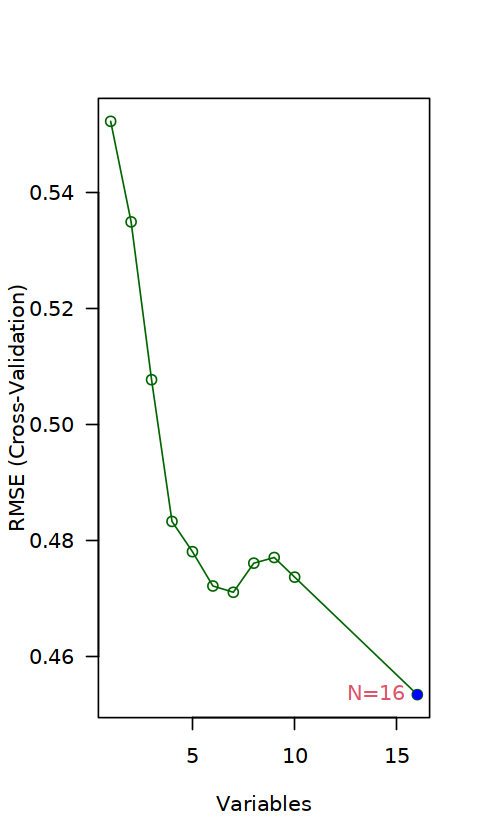

In [30]:
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

In [31]:
#输出
featureGenes = Profile$optVariables
write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

In [32]:
featureGenes

[1] "HIST1H3F" "PLXNB3"   "ITGA2B"   "RNF208"   "HBE1"     "SAMD14"  
 [7] "GAD1"     "SEC14L5"  "MSLN"     "MAP1B"    "IGF2"     "CTAGE6"  
[13] "OTOF"     "SCGB1C1"  "POU2F3"   "RASD2"

### Boruta

In [33]:
library(Boruta)

In [34]:
x = as.matrix(expr)
y = Type

In [35]:
set.seed(1)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [36]:
boruta

Boruta performed 286 iterations in 12.60918 secs.
 9 attributes confirmed important: GAD1, HBE1, HIST1H3F, ITGA2B, MSLN
and 4 more;
 7 attributes confirmed unimportant: CTAGE6, IGF2, MAP1B, OTOF, SAMD14
and 2 more;

In [37]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        0         9         7 

In [38]:
boruta$finalDecision

ITGA2B     RASD2      MSLN   SEC14L5      OTOF      GAD1     MAP1B    POU2F3 
Confirmed Confirmed Confirmed  Rejected  Rejected Confirmed  Rejected Confirmed 
   SAMD14      IGF2   SCGB1C1    PLXNB3    RNF208      HBE1  HIST1H3F    CTAGE6 
 Rejected  Rejected  Rejected Confirmed Confirmed Confirmed Confirmed  Rejected 
Levels: Tentative Confirmed Rejected

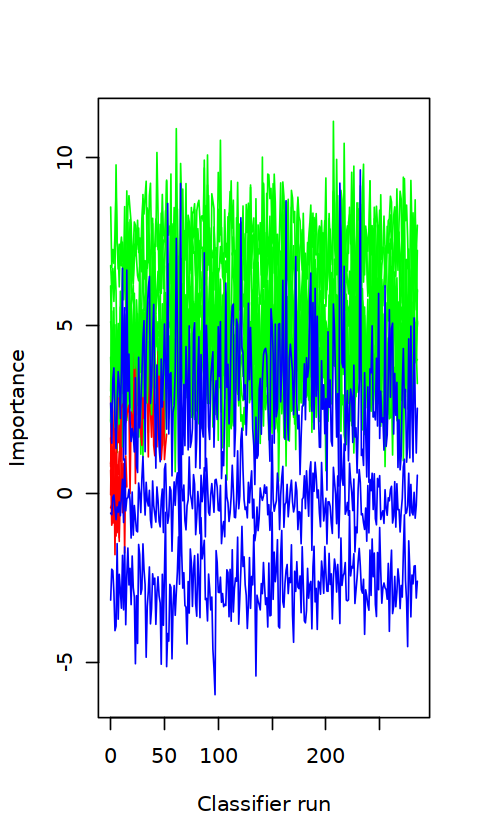

In [39]:
Boruta::plotImpHistory(boruta)

In [40]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




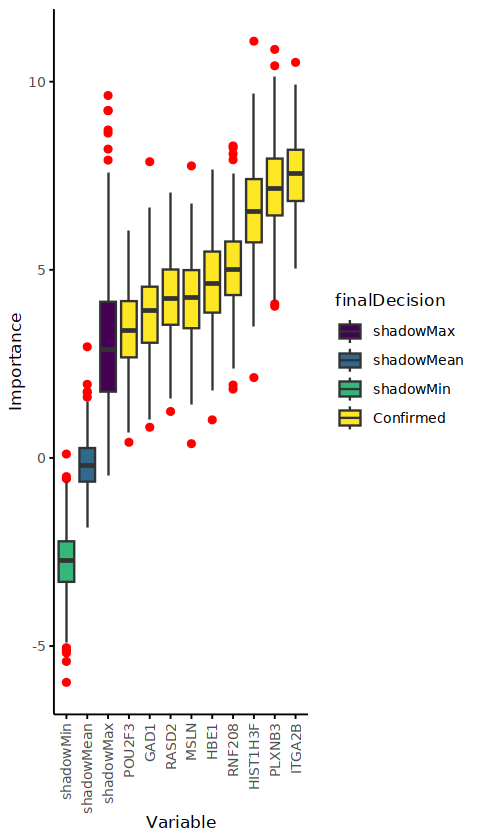

In [41]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [42]:
Group = data.frame(Group =  c(rep('CI',43),rep('H',42),rep('CI',16),rep('H',18)))

In [43]:
expr3 = cbind(Group,expr)

In [44]:
set.seed(157)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [45]:
table(test$Group)


CI  H 
19 20 

In [46]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [47]:
train_label <- as.numeric(train$Group == 'CI')
test_label <-  as.numeric(test$Group == 'CI')
all_label <-  as.numeric(expr3$Group == 'CI')

In [48]:
all_label

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [49]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [50]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.492754 
[2]	train-logloss:0.387340 
[3]	train-logloss:0.304565 
[4]	train-logloss:0.250275 
[5]	train-logloss:0.208174 
[6]	train-logloss:0.176541 
[7]	train-logloss:0.155663 
[8]	train-logloss:0.139250 
[9]	train-logloss:0.125193 
[10]	train-logloss:0.111771 
[11]	train-logloss:0.102139 
[12]	train-logloss:0.094551 
[13]	train-logloss:0.086578 
[14]	train-logloss:0.080272 
[15]	train-logloss:0.075763 
[16]	train-logloss:0.072308 
[17]	train-logloss:0.068349 
[18]	train-logloss:0.065166 
[19]	train-logloss:0.062227 
[20]	train-logloss:0.060119 
[21]	train-logloss:0.057802 
[22]	train-logloss:0.055030 
[23]	train-logloss:0.053512 
[24]	train-logloss:0.051540 
[25]	train-logloss:0.050279 


In [51]:
xgb

##### xgb.Booster
raw: 31.5 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 16 
niter: 25
nfeatures : 16 
evaluation_log:
    iter train_logloss
       1    0.49275417
       2    0.38733973
---                   
      24    0.05153964
      25    0.05027937

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
PLXNB3,0.19441014,0.13685150,0.10000
HIST1H3F,0.09235595,0.11757216,0.10000
POU2F3,0.09182055,0.07355698,0.05000
HBE1,0.07875099,0.07720612,0.07500
CTAGE6,0.07237793,0.05991169,0.06875
OTOF,0.06552446,0.06158077,0.08750


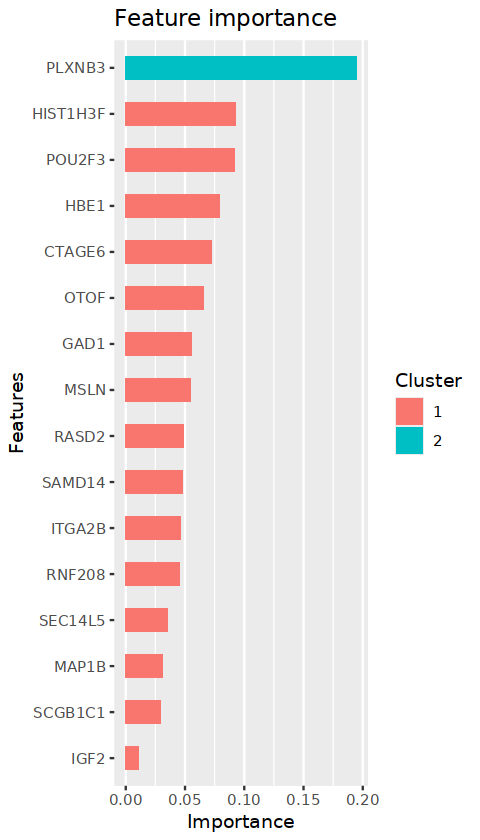

In [52]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

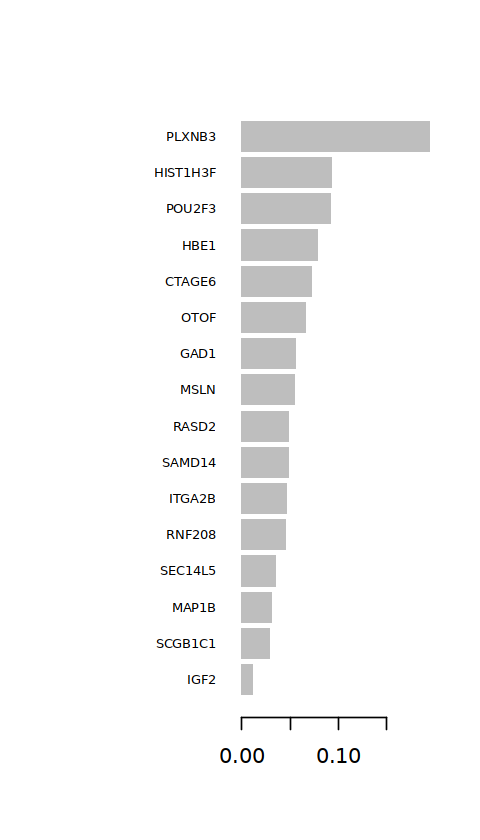

In [53]:
xgb.plot.importance(importance)

In [54]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3




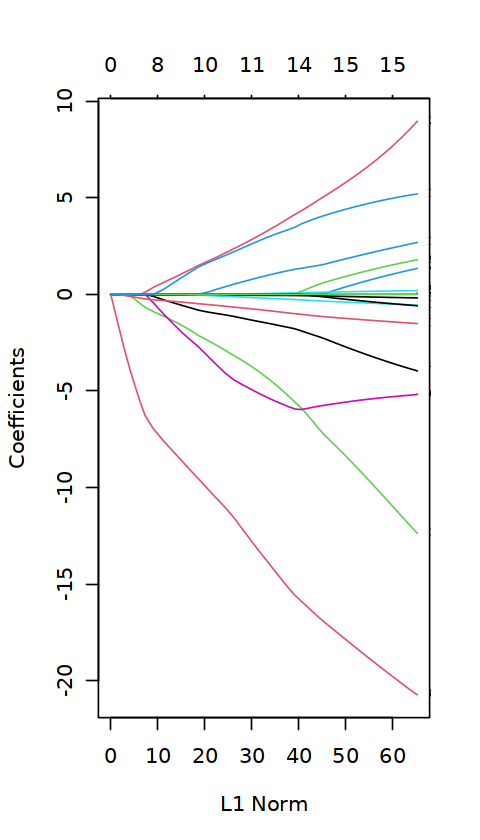

In [55]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

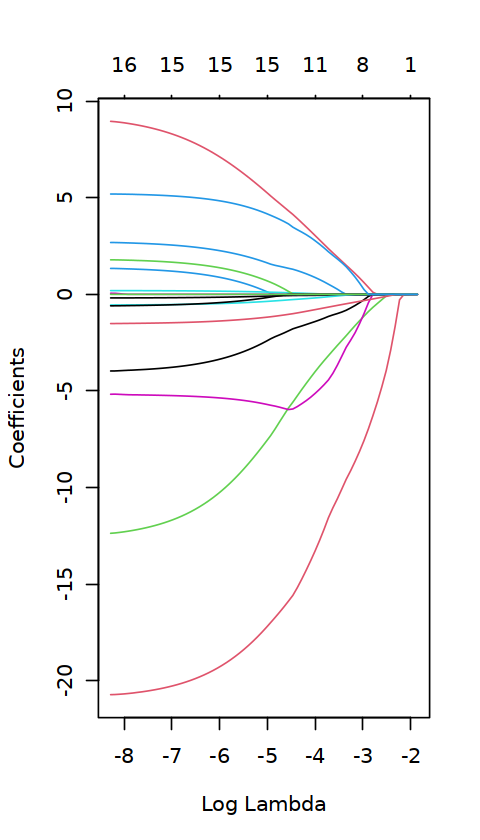

In [56]:
plot(model_lasso, xvar="lambda", label=TRUE)

[1] 0.07377742 0.15529440

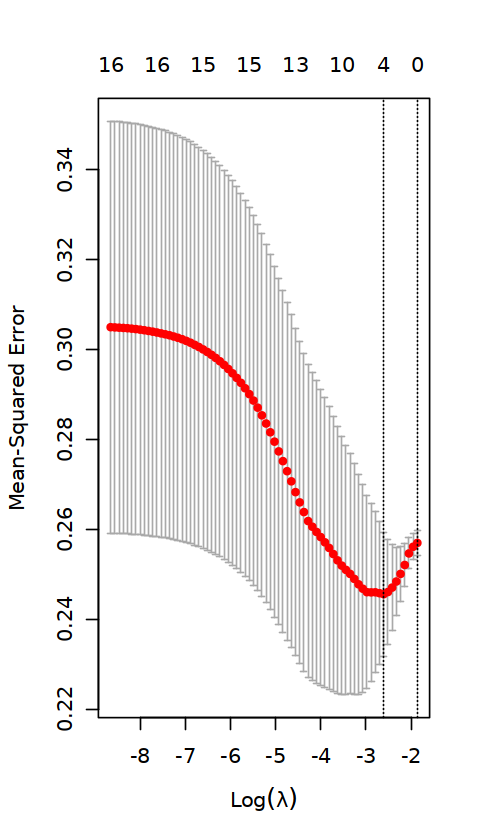

In [57]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [58]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [59]:
gene_1se

[1] "ITGA2B" "MSLN"   "POU2F3" "HBE1"

### 韦恩图

In [60]:
RF.gene = colnames(sigExp)
SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature

In [61]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed')) %>% dplyr::select(Variable) %>% unique()

In [62]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [63]:
list1 = list(Boruta.gene,SVF.RFE.gene, RF.gene,XGBoost.gene) #

In [64]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 1)"


In [65]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(Boruta.gene = data[,1], XGBoost.gene = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"


png 
  2

In [66]:
options(repr.plot.width = 6)

In [67]:
XGBoost.gene

[1] "PLXNB3"   "HIST1H3F" "POU2F3"   "HBE1"     "CTAGE6"   "OTOF"    
 [7] "GAD1"     "MSLN"     "RASD2"    "SAMD14"   "ITGA2B"   "RNF208"  
[13] "SEC14L5"  "MAP1B"    "SCGB1C1"  "IGF2"

In [68]:
intersect(SVF.RFE.gene,Boruta.gene)

[1] "HIST1H3F" "PLXNB3"   "ITGA2B"   "RNF208"   "HBE1"     "GAD1"     "MSLN"    
[8] "POU2F3"   "RASD2"

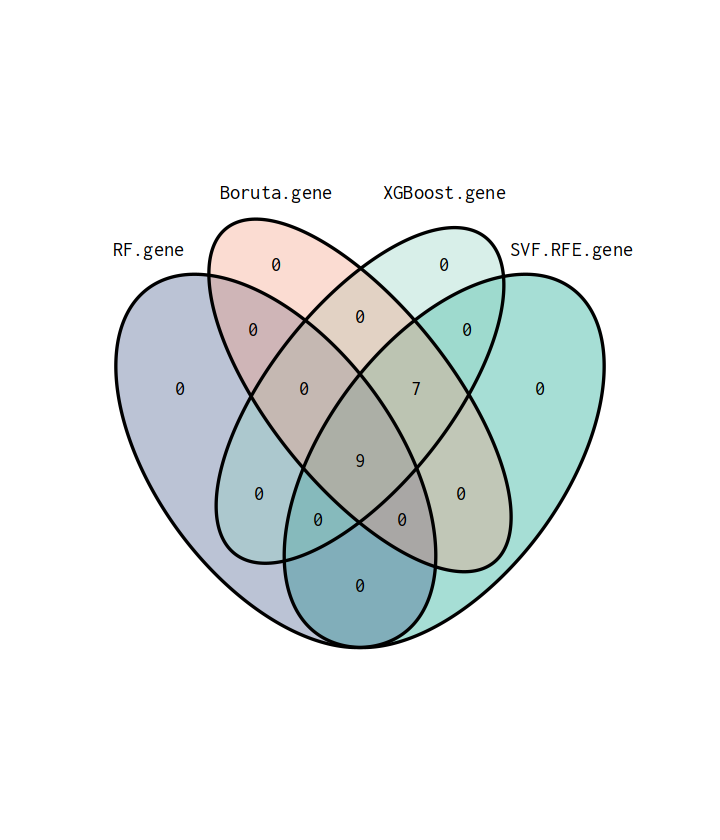

In [69]:
grid.draw(q)

In [70]:
model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),SVF.RFE.gene)#

In [71]:
model.gene = intersect(SVF.RFE.gene,Boruta.gene)

In [72]:
#model.gene = gene_1se

In [73]:
model.gene = Boruta.gene

In [74]:
model.gene

[1] "GAD1"     "HBE1"     "HIST1H3F" "ITGA2B"   "MSLN"     "PLXNB3"   "POU2F3"  
[8] "RASD2"    "RNF208"

In [75]:
set.seed(1234)
expr3 = cbind(Group,expr)

In [76]:
expr3[expr3$Group =='CI',]$Group<-1

In [77]:
expr3[expr3$Group =='H',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [78]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [79]:
dim(expr4)

[1] 119  10

In [80]:
head(expr4,4)

,Group,GAD1,HBE1,HIST1H3F,ITGA2B,MSLN,PLXNB3,POU2F3,RASD2,RNF208
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,1,-0.001133514,0.13897265,3.334643,2.014364,0.001604972,-0.0008865713,0.0003358557,0.001520324,0.06803851
CI11_M1,1,0.015039617,0.06789091,2.322905,5.547279,0.001604972,0.0161659861,0.0122994827,0.001520324,0.24235892
CI12_M1,1,-0.001133514,0.02127094,2.011802,2.475430,0.024781435,0.0518805782,0.0003358557,0.001520324,0.19569354
CI13_M1,1,0.053633010,0.08047129,9.098753,4.924585,0.001604972,0.0496398609,0.0003358557,0.001520324,0.90949074


In [81]:
library(caret)
library(ggplot2)

### 这里使用48个基因先看看情况



In [82]:
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "RASD2 0.561864406779661"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 25 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [83]:
#expr4 = expr3

In [84]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following object is masked from 'package:purrr':

    compact


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following object is masked from 'package:e1071':

    impute


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    for

In [85]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [86]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [87]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GAD1,-19.21638453,9.56325272,-2.0093984,0.044494902,4.512635e-09,9.924330e-18,2.264970e-01,GAD1
HBE1,-1.95704969,1.00239558,-1.9523726,0.050893980,1.412746e-01,1.296534e-02,6.261262e-01,HBE1
HIST1H3F,-0.00905099,0.01240271,-0.7297590,0.465537527,9.909898e-01,9.626648e-01,1.013965e+00,HIST1H3F
ITGA2B,-0.09169750,0.03010819,-3.0455998,0.002322167,9.123811e-01,8.547050e-01,9.622652e-01,ITGA2B
MSLN,-16.10950933,7.19349472,-2.2394552,0.025126312,1.008623e-07,1.510554e-14,1.594259e-02,MSLN
PLXNB3,-5.84208053,2.19572671,-2.6606592,0.007798784,2.902797e-03,2.448516e-05,1.469925e-01,PLXNB3
POU2F3,-20.85288700,8.78417825,-2.3739144,0.017600632,8.784282e-10,5.986227e-18,9.112343e-03,POU2F3
RASD2,6.98206042,7.29989138,0.9564609,0.338839447,1.077135e+03,5.769841e-01,1.059842e+12,RASD2
RNF208,-0.98553322,0.40174854,-2.4531097,0.014162716,3.732402e-01,1.604332e-01,7.796660e-01,RNF208


In [102]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 


In [103]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [104]:
Uni_log[tzgene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GAD1,-19.2163845,0.044494902,4.512635e-09,9.924330e-18,0.226497005,GAD1
ITGA2B,-0.0916975,0.002322167,9.123811e-01,8.547050e-01,0.962265220,ITGA2B
MSLN,-16.1095093,0.025126312,1.008623e-07,1.510554e-14,0.015942593,MSLN
PLXNB3,-5.8420805,0.007798784,2.902797e-03,2.448516e-05,0.146992516,PLXNB3
POU2F3,-20.8528870,0.017600632,8.784282e-10,5.986227e-18,0.009112343,POU2F3
RNF208,-0.9855332,0.014162716,3.732402e-01,1.604332e-01,0.779665978,RNF208


### 多因素分析

In [105]:
tzgene

[1] "GAD1"   "ITGA2B" "MSLN"   "PLXNB3" "POU2F3" "RNF208"

In [106]:
#tzgene1 = tzgene[-5]

In [107]:
data = expr4[,c('Group',tzgene)]
data$Group = factor(data$Group,levels = c(1,0))

In [108]:
fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.79322  -1.00681   0.00118   1.12408   1.65986  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.29223    0.38625  -3.346 0.000821 ***
GAD1         9.96585   10.51564   0.948 0.343273    
ITGA2B       0.08073    0.06701   1.205 0.228302    
MSLN        12.46646    7.38870   1.687 0.091559 .  
PLXNB3      -1.29913    4.58552  -0.283 0.776938    
POU2F3      17.02116    9.46101   1.799 0.072005 .  
RNF208      -0.02319    0.71023  -0.033 0.973950    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.96  on 118  degrees of freedom
Residual deviance: 140.75  on 112  degrees of freedom
AIC: 154.75

Number of Fisher Scoring iterations: 6


In [109]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=154.75
Group ~ GAD1 + ITGA2B + MSLN + PLXNB3 + POU2F3 + RNF208

         Df Deviance    AIC
- RNF208  1   140.75 152.75
- PLXNB3  1   140.83 152.83
- GAD1    1   141.67 153.67
- ITGA2B  1   142.29 154.29
<none>        140.75 154.75
- POU2F3  1   144.32 156.32
- MSLN    1   145.71 157.71

Step:  AIC=152.75
Group ~ GAD1 + ITGA2B + MSLN + PLXNB3 + POU2F3

         Df Deviance    AIC
- PLXNB3  1   140.84 150.84
- GAD1    1   141.71 151.71
- ITGA2B  1   142.54 152.54
<none>        140.75 152.75
- POU2F3  1   144.34 154.34
+ RNF208  1   140.75 154.75
- MSLN    1   146.07 156.07

Step:  AIC=150.84
Group ~ GAD1 + ITGA2B + MSLN + POU2F3

         Df Deviance    AIC
- GAD1    1   141.90 149.90
<none>        140.84 150.84
- POU2F3  1   144.63 152.63
+ PLXNB3  1   140.75 152.75
+ RNF208  1   140.83 152.83
- MSLN    1   146.08 154.08
- ITGA2B  1   146.22 154.22

Step:  AIC=149.9
Group ~ ITGA2B + MSLN + POU2F3

         Df Deviance    AIC
<none>        141.90 149.90
+ GAD1    1   140.84 


Call:
glm(formula = Group ~ ITGA2B + MSLN + POU2F3, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.02753  -0.98426   0.00134   1.09121   1.60329  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.17304    0.35434  -3.311 0.000931 ***
ITGA2B       0.07396    0.02955   2.503 0.012320 *  
MSLN        12.34516    7.22708   1.708 0.087603 .  
POU2F3      16.71886    9.18947   1.819 0.068858 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.96  on 118  degrees of freedom
Residual deviance: 141.90  on 115  degrees of freedom
AIC: 149.9

Number of Fisher Scoring iterations: 6


In [110]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-1.173,10.959,0.309(0.149~0.602),<0.001
ITGA2B,0.074,6.264,1.077(1.022~1.149),0.012
MSLN,12.345,2.918,229845.131(3.025~2181538482603.5),0.088
POU2F3,16.719,3.310,18235130.921(0.669~5046809761056027),0.069


In [111]:
set.seed(21)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] 0.6796086

In [98]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 1


Setting levels: control = 1, case = 2

Setting direction: controls < cases



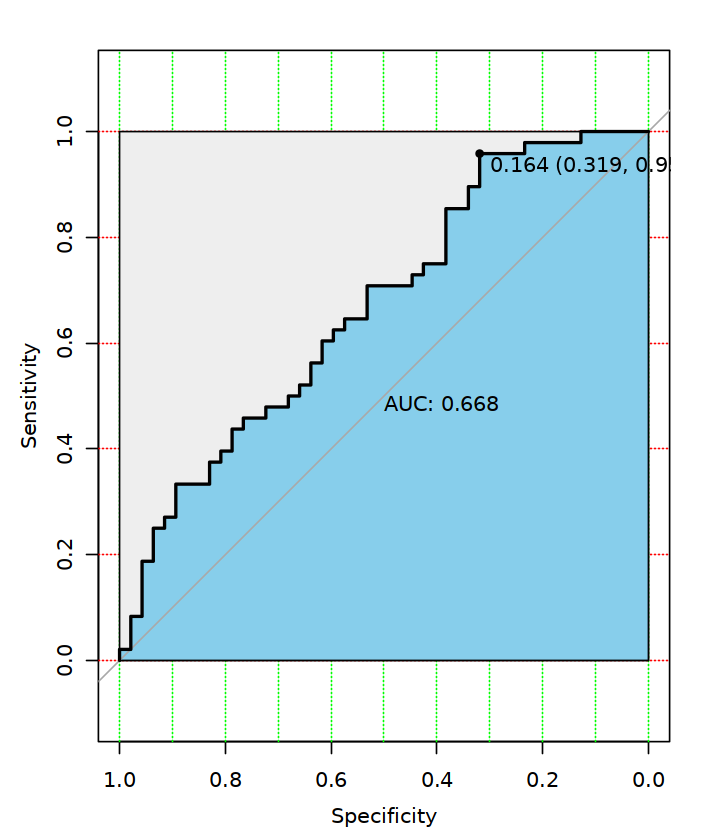

In [99]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [100]:
library(ROCR)

dd<-datadist(data)  #开始打包数据
options(datadist="dd")

data$Group = as.factor(data$Group)

fit1 <- lrm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130, data=data,x=T,y=T)


fit1

#  https://blog.csdn.net/Ayue0616/article/details/126601832

# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

# https://blog.csdn.net/Dr_long1996/article/details/135446784

save(fit1,data,file = 'train.fit1.rda')

#列线图代码只能在Rstudio话

# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

Warning message:
"package 'ROCR' was built under R version 4.2.3"


ERROR: Error in eval(predvars, data, callenv): object 'TNFSF14' not found


In [ ]:
getwd()

In [ ]:
# library(rms)   ###加载rms包#
# #f = readRDS('C:/Users/Bonjour/Desktop/bulk2.fit1.rds')
# load('C:/Users/Bonjour/Desktop/train.fit1.rda')
# summary(fit1) 

# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = F, # 对齐变量
#         subticks = F,
#         droplines = F,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )
# fit1


In [94]:
fit.reduce <- glm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130,data=data,family=binomial())

In [95]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)


Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

In [96]:
df5

,Var,OR,Pvalue,OR_1,OR_2,OR_mean
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TNFSF14,TNFSF14,-0.24(-0.4~-0.11),0.001,-0.3984643,-0.10646039,-0.2376950
CCNA2,CCNA2,-3.11(-5.03~-1.54),0.000,-5.0303016,-1.54327199,-3.1092182
MARCKS,MARCKS,-0.14(-0.28~-0.03),0.018,-0.2757006,-0.03433449,-0.1433905
SGOL1,SGOL1,-6.32(-10.69~-2.45),0.002,-10.6908772,-2.45313728,-6.3197097
SAP130,SAP130,-0.68(-1.07~-0.37),0.000,-1.0714897,-0.36875580,-0.6825936


In [97]:

# library(forestplot)
# fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=1,
#            boxsize=0.2,
#            graph.pos=2)

In [260]:
library("autoReg")


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [261]:
dim(data)

[1] 119   4

In [262]:
table(data$Group)


 1  0 
59 60 

In [263]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,1 (N=59),0 (N=60),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HIST1H2BM,Mean <U+00B1> SD,14.1 <U+00B1> 17.9,6.8 <U+00B1> 3.4,HIST1H2BM,"0.87 (0.80-0.96, p=.003)","0.84 (0.75-0.94, p=.002)"
CEACAM1,Mean <U+00B1> SD,10.7 <U+00B1> 9.7,7.2 <U+00B1> 3.2,CEACAM1,"0.83 (0.74-0.94, p=.002)","0.81 (0.71-0.92, p=.001)"
CDKN1A,Mean <U+00B1> SD,7.4 <U+00B1> 3.6,9.7 <U+00B1> 4.1,CDKN1A,"1.18 (1.06-1.31, p=.003)","1.38 (1.17-1.62, p<.001)"


In [264]:
overall.log =  glm(Group~.,data=fold_test,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,1 (N=47),0 (N=48),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HIST1H2BM,Mean <U+00B1> SD,14.6 <U+00B1> 19.2,6.5 <U+00B1> 3.2,HIST1H2BM,"0.85 (0.76-0.95, p=.004)","0.85 (0.75-0.96, p=.010)"
CEACAM1,Mean <U+00B1> SD,10.7 <U+00B1> 10.6,7.4 <U+00B1> 3.3,CEACAM1,"0.86 (0.76-0.98, p=.021)","0.85 (0.74-0.97, p=.018)"
CDKN1A,Mean <U+00B1> SD,7.2 <U+00B1> 3.9,9.4 <U+00B1> 4.0,CDKN1A,"1.16 (1.03-1.31, p=.011)","1.33 (1.12-1.57, p<.001)"


In [265]:
# https://blog.csdn.net/m0_72224305/article/details/126825816

In [266]:
# https://www.mebis.cn/kexuexinwen/1035.html  解释了保护因子和危险因子的含义

In [267]:
options(repr.plot.width = 8)

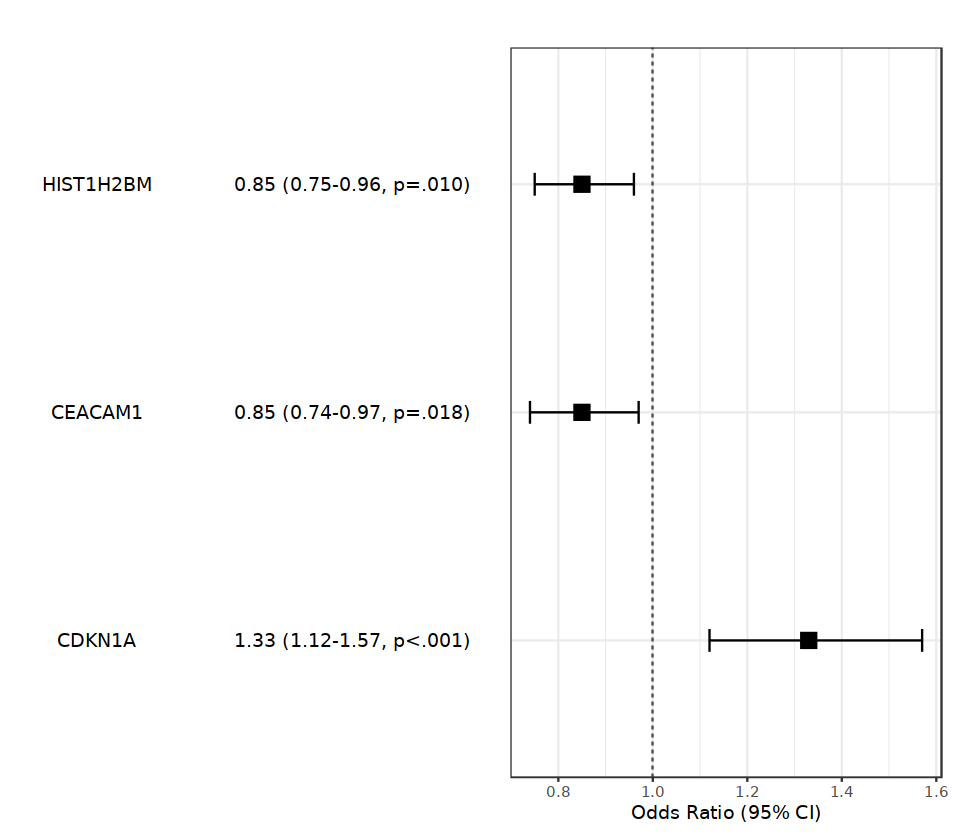

In [268]:
modelPlot(overall.log,change.pointsize = T)

In [269]:
tend = expr3

In [270]:
tend$Group = ifelse(tend$Group == 1, 'CI','H')

In [271]:
model.gene

[1] "HIST1H2BM" "CEACAM1"   "HIST1H3F"  "CDKN1A"    "ZNF300"    "RCN3"     
[7] "MSLN"      "HBE1"

In [272]:
model.gene = c('CEACAM1','HIST1H2BM','CDKN1A')

In [273]:
tend = tend[,c('Group',model.gene)]

In [274]:
head(tend,2)

,Group,CEACAM1,HIST1H2BM,CDKN1A
,<chr>,<dbl>,<dbl>,<dbl>
CI10_M1,CI,6.247454,10.420602,5.173722
CI11_M1,CI,14.772961,3.172594,5.430353


In [275]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp


Loading required package: ggsci

Warning message:
"package 'ggsci' was built under R version 4.2.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend


The following object is masked from 'package:plyr':

    mutate


The following object is masked from 'package:VennDiagram':

    rotate




In [277]:
mydata<-tend %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",CEACAM1:CDKN1A) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [278]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
CEACAM1,Expression,CI,H,0.010401180,0.0100,0.0104,*,T-test
HIST1H2BM,Expression,CI,H,0.002933751,0.0059,0.0029,**,T-test
CDKN1A,Expression,CI,H,0.001294738,0.0039,0.0013,**,T-test


In [ ]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))

diffgene = rownames(diffgene) = diffgene[,1]

options(repr.plot.height = 5,repr.plot.width = 21)

options(repr.plot.width = 7,repr.plot.height = 5)

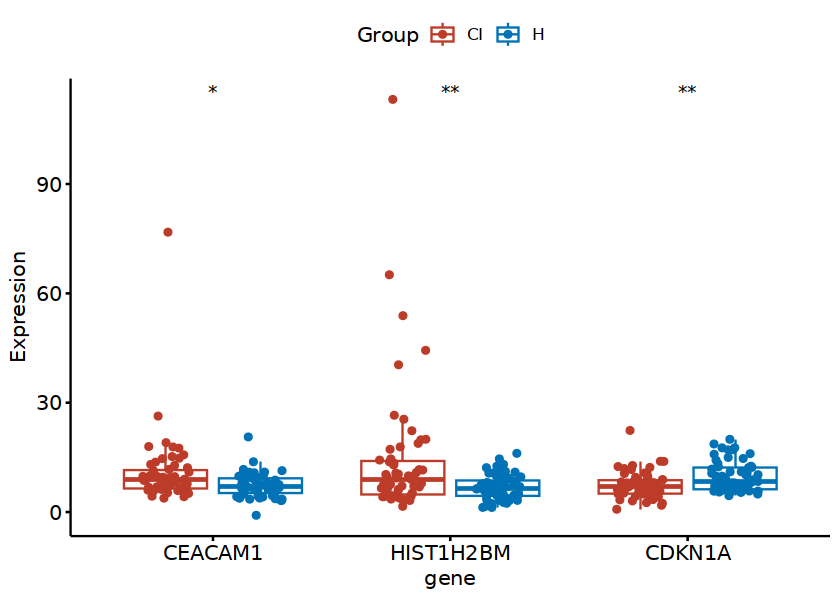

In [281]:
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [ ]:
tend1 = tend[,c( 2:6)] 

gene_cor <- cor(tend1, method = 'pearson')

diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)

library(circlize)
pdf('cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)
dev.off()

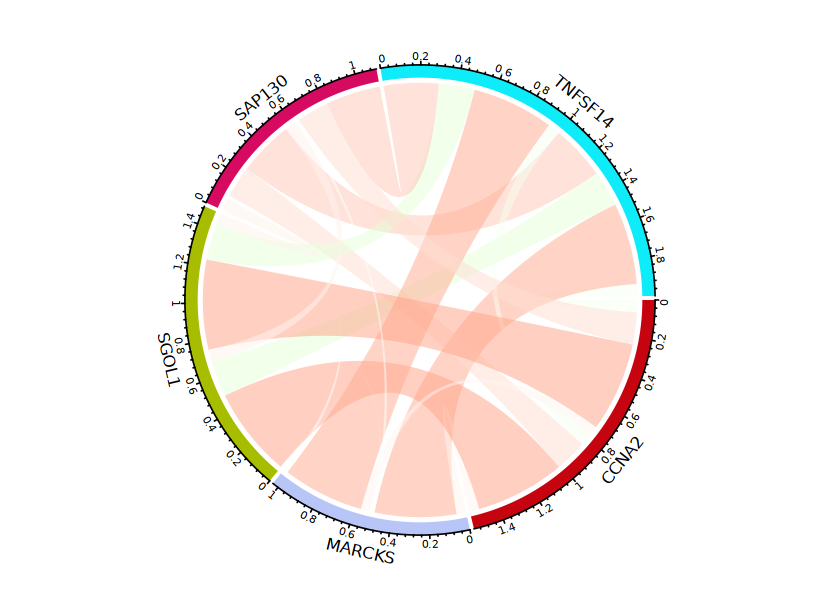

In [125]:
chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    #grid.col = c(GABRD = 'green3', PLVAP = 'red', CDKN3 = 'orange', CDC25C = 'purple', UBE2T = 'skyblue', SKA1 = 'blue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), )#名称离圆弧的距离，以及圆弧的宽度

In [129]:
save(data,file = 'data.rda')

In [130]:
library(autoReg)

In [131]:
logreg4<-autoReg(fit.reduce,uni=TRUE,threshold=0.05, final=T)   #final=T逐步回归
logreg4
logtable4<-myft(logreg4)

name,desc,1 (N=59),0 (N=60),id,OR (univariable),OR (multivariable),OR (final)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TNFSF14,Mean <U+00B1> SD,24.4 <U+00B1> 6.8,19.4 <U+00B1> 3.7,TNFSF14,"0.84 (0.77-0.91, p<.001)","0.79 (0.68-0.91, p=.001)","0.79 (0.68-0.91, p=.001)"
CCNA2,Mean <U+00B1> SD,1.7 <U+00B1> 1.2,1.1 <U+00B1> 0.4,CCNA2,"0.17 (0.07-0.42, p<.001)","0.04 (0.01-0.25, p<.001)","0.04 (0.01-0.25, p<.001)"
MARCKS,Mean <U+00B1> SD,22.1 <U+00B1> 7.0,17.3 <U+00B1> 5.5,MARCKS,"0.88 (0.83-0.94, p<.001)","0.87 (0.77-0.98, p=.018)","0.87 (0.77-0.98, p=.018)"
SGOL1,Mean <U+00B1> SD,0.5 <U+00B1> 0.2,0.4 <U+00B1> 0.2,SGOL1,"0.04 (0.00-0.36, p=.004)","0.00 (0.00-0.10, p=.002)","0.00 (0.00-0.10, p=.002)"
SAP130,Mean <U+00B1> SD,14.5 <U+00B1> 2.8,12.0 <U+00B1> 1.7,SAP130,"0.55 (0.43-0.70, p<.001)","0.51 (0.36-0.71, p<.001)","0.51 (0.36-0.71, p<.001)"
